In [ ]:
# k-Means demo
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# n = 1000 # random data

m = 2

# Set the number of clusters (k)
k = 5

XData = np.load("blobs.npy")
n = len(XData) # is 500 for blobs.npy

num_realizations = 10

Question 1 part c:


In [ ]:
# Random initialization
def rand_init(X, k):
  c = np.vstack([np.random.uniform(-1,1,k), np.random.uniform(-1,1,k)]).T #np.zeros(shape=(k, m))
  return c

# k++ initialization
def k_plus(X, k):
  c = np.vstack([np.random.uniform(-1,1,k), np.random.uniform(-1,1,k)]).T
  c[0] = XData[np.random.choice(n)]

  for i in range(1, k):
    # Find distance between each data point and its nearest rep vector
    nearest_dist = np.array([min(np.linalg.norm((c[j] - xD), ord=2) for j in range(i)) for xD in XData])

    # Pick next rep vec as the point with the highest dist
    next_rep_index = np.argmax(nearest_dist)
    c[i] = XData[next_rep_index]
  return c

# Function calculates coherence
def coherence(X, centroids, labels):
  coherence = 0
  for i, centroid in enumerate(centroids):
    indices = np.where(labels == i)[0]
    coherence += np.sum(np.linalg.norm((X[indices] - centroid), axis=1, ord=2))
  return coherence

In [ ]:
random_coherence = [] # coherence of random init per trial
k_plus_coherence = [] # coherence of k++ init per trial

for _ in range(num_realizations): # Loops 10x in our case

    # Random init:
    random_centroids = rand_init(XData, k)
    closestCluster = np.zeros(len(XData))
    for d in range(len(XData)):
        xD = XData[d, :]
        sqDistMin = 1e16
        for i in range(k):
            sqDist = np.linalg.norm(random_centroids[i, :] - xD, ord=2)
            if sqDist < sqDistMin:
                closestCluster[d] = i
                sqDistMin = sqDist
    IndexSet = closestCluster.astype(int) # our 'labels' param to be passed
    random_coherence.append(coherence(XData, random_centroids, IndexSet))

    # k++ init
    k_plus_centroids = k_plus(XData, k)
    closestCluster = np.zeros(len(XData))
    for d in range(len(XData)):
        xD = XData[d, :]
        sqDistMin = 1e16
        for i in range(k):
            sqDist = np.linalg.norm(k_plus_centroids[i, :] - xD, ord=2)
            if sqDist < sqDistMin:
                closestCluster[d] = i
                sqDistMin = sqDist
    IndexSet = closestCluster.astype(int) # labels param
    k_plus_coherence.append(coherence(XData, k_plus_centroids, IndexSet))


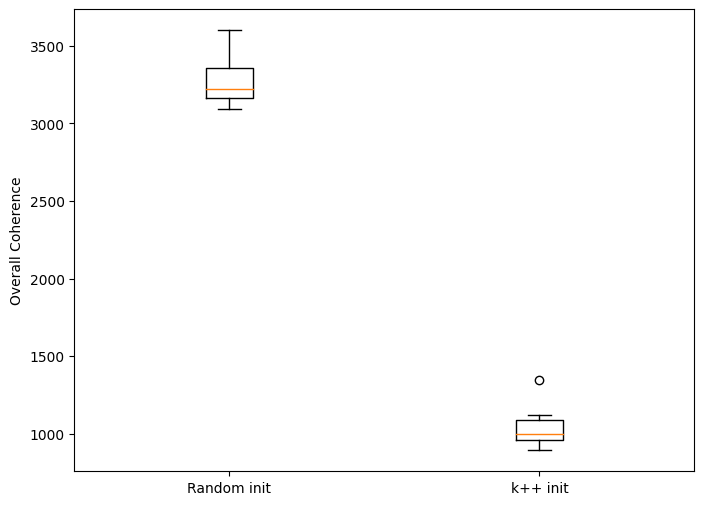

In [ ]:
# Plots
plt.figure(figsize=(8, 6))
plt.boxplot([random_coherence, k_plus_coherence], labels=['Random init', 'k++ init'])
plt.ylabel('Overall Coherence')
plt.show()

In [ ]:
random_avg_coherence = np.mean(random_coherence)
k_plus_avg_coherence = np.mean(k_plus_coherence)
print("random init average coherence: ", random_avg_coherence)
print("k++ init average coherence: ", k_plus_avg_coherence)

random init average coherence:  3279.542290246182
k++ init average coherence:  1039.5696601560392


Of course, k++ initialization had a much lower coherence level, which makes sense, because the nodes are initialized to lie on an exact data point, while being spread out from one another. However, the downside is the runtime of the initialization itself. At least in my implementation, a triple nested for loop was used, which is very inefficient.